For this 9th tutorial we will look at extreme levels spatially, and consider the importance of thresholds

In [1]:
# <Yosmely Bermúdez> comments
# Mount Google Drive locally
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd gdrive/Shareddrives/Academy/Courses/Climate/Climatematch/02-Curriculum/Climatematch\ Content\ Folder/W2D4\ -\ Climate\ Response\ -\ Extremes\ \&\ Variability/W2D4\ Tutorials

/content/gdrive/Shareddrives/Academy/Courses/Climate/Climatematch/02-Curriculum/Climatematch Content Folder/W2D4 - Climate Response - Extremes & Variability/W2D4 Tutorials


In [3]:
#install dependencies - taken from <Yosmely Bermúdez> comments for Tutorial 6
# We need this to install eigen which is needed for SDFC to install correctly
!pip install -q condacolab
import condacolab
condacolab.install()
!conda install eigen
!pip install -v https://github.com/yrobink/SDFC/archive/master.zip#subdirectory=python
!pip install https://github.com/njleach/mystatsfunctions/archive/master.zip
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install cmocean
!pip install pandas
!pip install cartopy
!pip install scipy
!pip install texttable

✨🍰✨ Everything looks OK!
Solving environment: - \ | / - \ | / - \ | / - done

# All requested packages already installed.

Using pip 23.0.1 from /usr/local/lib/python3.9/site-packages/pip (python 3.9)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/yrobink/SDFC/archive/master.zip
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-a55ir1x7/SDFC.egg-info
  writing /tmp/pip-pip-egg-info-a55ir1x7/SDFC.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-a55ir1x7/SDFC.egg-info/dependency_links.txt
  writing requirements to /tmp/pip-pip-egg-info-a55ir1x7/SDFC.egg-info/requires.txt
  writing top-level names to /tmp/pip-pip-egg-info-a55ir1x7/SDFC.egg-info/top_level.txt
  writing manifest file '/tmp/pip-pip-egg-info-a55ir1x7/SDFC.egg-info/SOURCES.txt'
  reading manifest file '/tmp/pip-pip-egg-info-a55ir1x7/SDFC.egg-info/SOURC

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import pandas as pd
import seaborn as sns
import cmocean.cm as cmo

import os

#import cftime
#import nc_time_axis

import numpy as np
import cartopy.crs as ccrs
from scipy import stats

In [5]:
import extremes_functions as ef
from mystatsfunctions import OLSE,LMoments
import SDFC as sd

In [6]:
gev = stats.genextreme

In [7]:
def estimate_return_level(quantile,model):
    loc, scale, shape = model.coef_
    level = loc - scale / shape * (1 - (-np.log(quantile))**(-shape))
    # level = stats.genextreme.ppf(quantile,-shape,loc=loc,scale=scale)
    return level
def estimate_return_level2(quantile,model):
    loc, scale, shape = model.loc, model.scale, model.shape
    level = loc - scale / shape * (1 - (-np.log(quantile))**(-shape))
    # level = stats.genextreme.ppf(quantile,-shape,loc=loc,scale=scale)
    return level
def estimate_return_level3(quantile,loc,scale,shape):
    level = loc - scale / shape * (1 - (-np.log(quantile))**(-shape))
    return level

In [8]:
# os.chdir('/Users/neam/Downloads/dataset-sis-extreme-indices-cmip6-b9ddd016-4457-432c-afc5-006765f6720d/')
# os.chdir('../wetbulb/')

The human body has physiological limits within which it can operate. When it is very hot, the body cools through sweat, that is evaporating water off the skin, which cools the body through "latent heat loss". This depends on the ability of the air to take up that water. This is why sweating is more efficient in dry heat, and why humid heat feels "hotter" - it is harder for the body to cool down.

Consequently, the combination of temperature and humidity imposes limits on the body to regulate its temperature. One metric of the combined effect is the "wet bulb temperature", the temperature a thermometer shows when wrapped in a wet sock. 

Here we use wet bulb temperature calculated from the MPI-ESM1-2-HR climate model run by the Max Planck Institute for Meteorology in Hamburg, Germany, for the historical period, and three future climate scenarios.

In pre-processing, the data was averaged over 7-days and then the annual maximum was computed. Therefore, for each grid point, the data describes the wet bulb temperature of the most extreme 7-day period in each year..

In [9]:
wetbulb_hist = xr.open_dataset('WBGT_day_MPI-ESM1-2-HR_historical_r1i1p1f1_raw_runmean7_yearmax.nc').WBGT
wetbulb_hist['time'] = pd.date_range(str(wetbulb_hist['time.year'].values[0]),freq='1Y',periods=wetbulb_hist['time'].size)
wetbulb_126  = xr.open_dataset('WBGT_day_MPI-ESM1-2-HR_ssp126_r1i1p1f1_raw_runmean7_yearmax.nc').WBGT
wetbulb_126['time'] = pd.date_range(str(wetbulb_126['time.year'].values[0]),freq='1Y',periods=wetbulb_126['time'].size)
wetbulb_245 = xr.open_dataset('WBGT_day_MPI-ESM1-2-HR_ssp245_r1i1p1f1_raw_runmean7_yearmax.nc').WBGT
wetbulb_245['time'] = pd.date_range(str(wetbulb_245['time.year'].values[0]),freq='1Y',periods=wetbulb_245['time'].size)
wetbulb_585 = xr.open_dataset('WBGT_day_MPI-ESM1-2-HR_ssp585_r1i1p1f1_raw_runmean7_yearmax.nc').WBGT
wetbulb_585['time'] = pd.date_range(str(wetbulb_585['time.year'].values[0]),freq='1Y',periods=wetbulb_585['time'].size)

Let's look at how the data is structured:

In [10]:
wetbulb_hist

<xarray.DataArray 'WBGT' (time: 64, lat: 192, lon: 384)>
[4718592 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1951-12-31 1952-12-31 ... 2014-12-31
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * lat      (lat) float64 -89.28 -88.36 -87.42 -86.49 ... 87.42 88.36 89.28
Attributes:
    long_name:         Wet bulb globe temperature
    units:             1
    CDI_grid_type:     gaussian
    CDI_grid_num_LPE:  96
    cell_methods:      time: maximum

There is one data point per year on a latitude-longitude grid. Let's compute the grid spacing in the longitude and latitude directions:

In [11]:
wetbulb_hist.lon.diff('lon').values.mean()

0.9375

In [12]:
wetbulb_hist.lat.diff('lat').values.mean()

0.9349133773038073

Each box is about 1 degree by 1 degree. 1 degree latitude is approximately 110 km, 1 degree longitude is 110 km at the equator, which decreases when moving towards the poles.

So at the equator we are looking at 100-by-100 km grid boxes, somewhat less in the mid-latitudes. 

Can you think of limitations this induces?

For illustration, let's extract the grid box that includes the city of New Delhi, India

In [13]:
wetbulb_hist_delhi = wetbulb_hist.sel(lon=77.21,lat=28.61,method='nearest')
wetbulb_126_delhi = wetbulb_126.sel(lon=77.21,lat=28.61,method='nearest')
wetbulb_245_delhi = wetbulb_245.sel(lon=77.21,lat=28.61,method='nearest')
wetbulb_585_delhi = wetbulb_585.sel(lon=77.21,lat=28.61,method='nearest')

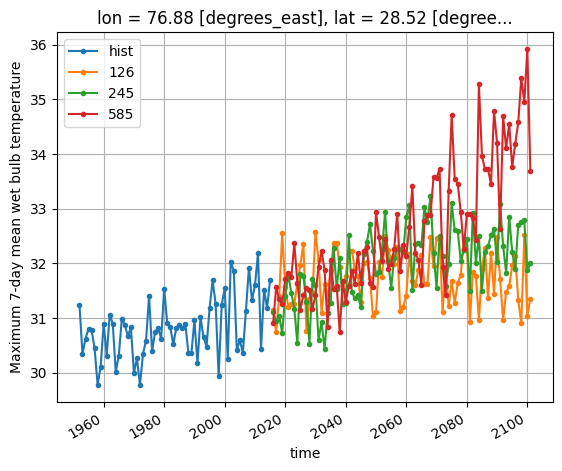

In [14]:
wetbulb_hist_delhi.plot.line('.-',label='hist')
wetbulb_126_delhi.plot.line('.-',label='126')
wetbulb_245_delhi.plot.line('.-',label='245')
wetbulb_585_delhi.plot.line('.-',label='585')

plt.legend()
plt.ylabel('Maximum 7-day mean wet bulb temperature')
plt.grid(True)

Note:
1. Trends are visible in the historical period
2. Clear differences between climate scenarios which become apparent at some point
3. Strong variability - each year is not necessarily warmer than the previous one

In [15]:
fit_hist, model_hist = ef.fit_return_levels_sdfc(wetbulb_hist_delhi.values,times=np.arange(1.1,1000),periods_per_year=1,kind='GEV',N_boot=1000,full=True,model=True)

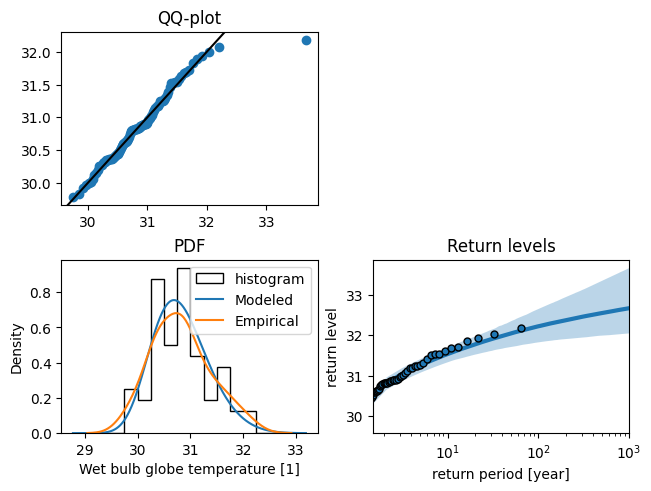

In [16]:
fig, axs = plt.subplots(2,2,constrained_layout=True)
ax = axs.flatten()

x = np.linspace(0,1,100)
ax[0].plot(gev.ppf(x, -fit_hist.xi.mean().values, loc=fit_hist.mu.mean().values, scale=fit_hist.sigma.mean().values), np.quantile(wetbulb_hist_delhi,x),'o')
xlim = ax[0].get_xlim()
ylim = ax[0].get_ylim()
ax[0].plot([min(xlim[0],ylim[0]),max(xlim[1],ylim[1])],[min(xlim[0],ylim[0]),max(xlim[1],ylim[1])],'k')

ax[0].set_xlim(xlim)
ax[0].set_ylim(ylim)


x = np.linspace(wetbulb_hist_delhi.min()-1, wetbulb_hist_delhi.max()+1, 1000)
wetbulb_hist_delhi.plot.hist(bins=np.arange(29,33,0.25),histtype='step',density=True,lw=1,color='k',ax=ax[2],label='histogram')
ax[2].plot(x,gev.pdf(x, -fit_hist.xi.mean().values, loc=fit_hist.mu.mean().values, scale=fit_hist.sigma.mean().values), label='Modeled')
sns.kdeplot(wetbulb_hist_delhi,ax=ax[2],label='Empirical')
ax[2].legend()

ef.plot_levels_from_obj(fit_hist,alpha=0.95,ax=ax[3])
ax[3].set_xlim(1.5,1000)
# ax[3].set_ylim(0,None)

ax[0].set_title('QQ-plot')
ax[2].set_title('PDF')
ax[3].set_title('Return levels')

ax[1].remove()

In [17]:
print('100-year return level: %.2f' % estimate_return_level(1-1/100,model_hist))

100-year return level: 32.23


Now let's compare with the last 50 years of the SSP-245 scenario, the middle scenario we looked at before. 2050-2100 are approximately stationary here (we will check this next!)

In [18]:
fit_245, model_245 = ef.fit_return_levels_sdfc(wetbulb_245_delhi.sel(time=slice('2051','2100')).values,times=np.arange(1.1,1000),periods_per_year=1,kind='GEV',N_boot=1000,full=True,model=True)

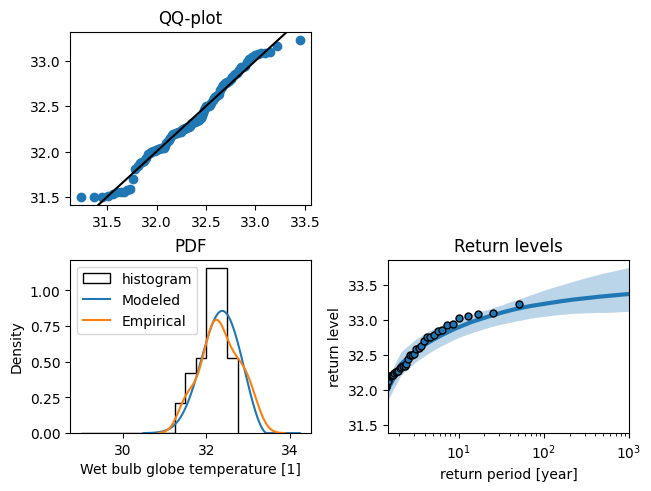

In [19]:
fig, axs = plt.subplots(2,2,constrained_layout=True)
ax = axs.flatten()

x = np.linspace(0,1,100)
ax[0].plot(gev.ppf(x, -fit_245.xi.mean().values, loc=fit_245.mu.mean().values, scale=fit_245.sigma.mean().values), np.quantile(wetbulb_245_delhi.sel(time=slice('2051','2100')),x),'o')
xlim = ax[0].get_xlim()
ylim = ax[0].get_ylim()
ax[0].plot([min(xlim[0],ylim[0]),max(xlim[1],ylim[1])],[min(xlim[0],ylim[0]),max(xlim[1],ylim[1])],'k')

ax[0].set_xlim(xlim)
ax[0].set_ylim(ylim)


x = np.linspace(wetbulb_245_delhi.sel(time=slice('2051','2100')).min()-1, wetbulb_245_delhi.sel(time=slice('2051','2100')).max()+1, 1000)
wetbulb_245_delhi.sel(time=slice('2051','2100')).plot.hist(bins=np.arange(29,33,0.25),histtype='step',density=True,lw=1,color='k',ax=ax[2],label='histogram')
ax[2].plot(x,gev.pdf(x, -fit_245.xi.mean().values, loc=fit_245.mu.mean().values, scale=fit_245.sigma.mean().values), label='Modeled')
sns.kdeplot(wetbulb_245_delhi.sel(time=slice('2051','2100')),ax=ax[2],label='Empirical')
ax[2].legend()

ef.plot_levels_from_obj(fit_245,alpha=0.95,ax=ax[3])
ax[3].set_xlim(1.5,1000)
# ax[3].set_ylim(0,None)

ax[0].set_title('QQ-plot')
ax[2].set_title('PDF')
ax[3].set_title('Return levels')

ax[1].remove()

In [20]:
print('100-year return level: %.2f' % estimate_return_level(1-1/100,model_245))

100-year return level: 33.25


You can plot the two results (historical and SSP-245) together to compare

Now we assume the location parameter to be a function of time, and estimate the GEV distribution for the 4 scenarios:

In [21]:
law_ns_hist = sd.GEV()
law_ns_hist.fit(wetbulb_hist_delhi.values, c_loc = np.arange(wetbulb_hist_delhi.time.size))

law_ns_126 = sd.GEV()
law_ns_126.fit(wetbulb_126_delhi.values, c_loc = np.arange(wetbulb_126_delhi.time.size))

law_ns_126 = sd.GEV()
law_ns_126.fit(wetbulb_126_delhi.values, c_loc = np.arange(wetbulb_126_delhi.time.size))

law_ns_245 = sd.GEV()
law_ns_245.fit(wetbulb_245_delhi.values, c_loc = np.arange(wetbulb_245_delhi.time.size))

law_ns_585 = sd.GEV()
law_ns_585.fit(wetbulb_585_delhi.values, c_loc = np.arange(wetbulb_585_delhi.time.size))

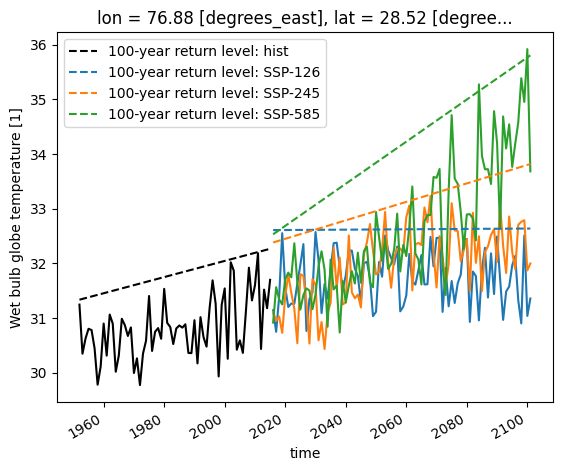

In [22]:
wetbulb_hist_delhi.plot.line(c='k')
wetbulb_126_delhi.plot.line(c='C0')
wetbulb_245_delhi.plot.line(c='C1')
wetbulb_585_delhi.plot.line(c='C2')

plt.plot(wetbulb_hist_delhi.time,estimate_return_level2(1-1/100,law_ns_hist),'k--',label='100-year return level: hist')
plt.plot(wetbulb_126_delhi.time,estimate_return_level2(1-1/100,law_ns_126),'C0--',label='100-year return level: SSP-126')
plt.plot(wetbulb_245_delhi.time,estimate_return_level2(1-1/100,law_ns_245),'C1--',label='100-year return level: SSP-245')
plt.plot(wetbulb_585_delhi.time,estimate_return_level2(1-1/100,law_ns_585),'C2--',label='100-year return level: SSP-585')

plt.legend()

In [23]:
def compute_aic(model):
    return 2 * len(model.coef_) + 2 * model.info.optim_result.fun

In [24]:
compute_aic(model_245)

68.71474794440502

In [25]:
compute_aic(law_ns_245)

136.83928076564047

Now we assume both the location and the scale parameter to be a function of time, and estimate the GEV distribution for the 4 scenarios:

In [26]:
law_ns_hist_loc_scale = sd.GEV()
law_ns_hist_loc_scale.fit(wetbulb_hist_delhi.values, c_loc = np.arange(wetbulb_hist_delhi.time.size), c_scale = np.arange(wetbulb_hist_delhi.time.size))

law_ns_126_loc_scale = sd.GEV()
law_ns_126_loc_scale.fit(wetbulb_126_delhi.values, c_loc = np.arange(wetbulb_126_delhi.time.size), c_scale = np.arange(wetbulb_126_delhi.time.size))

law_ns_126_loc_scale = sd.GEV()
law_ns_126_loc_scale.fit(wetbulb_126_delhi.values, c_loc = np.arange(wetbulb_126_delhi.time.size), c_scale = np.arange(wetbulb_126_delhi.time.size))

law_ns_245_loc_scale = sd.GEV()
law_ns_245_loc_scale.fit(wetbulb_245_delhi.values, c_loc = np.arange(wetbulb_245_delhi.time.size), c_scale = np.arange(wetbulb_245_delhi.time.size))

law_ns_585_loc_scale = sd.GEV()
law_ns_585_loc_scale.fit(wetbulb_585_delhi.values, c_loc = np.arange(wetbulb_585_delhi.time.size), c_scale = np.arange(wetbulb_585_delhi.time.size))

(29.453055235434075, 40.0)

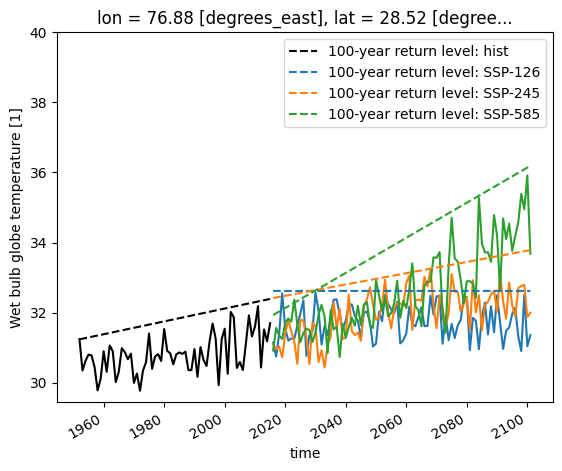

In [27]:
wetbulb_hist_delhi.plot.line(c='k')
wetbulb_126_delhi.plot.line(c='C0')
wetbulb_245_delhi.plot.line(c='C1')
wetbulb_585_delhi.plot.line(c='C2')

plt.plot(wetbulb_hist_delhi.time,estimate_return_level2(1-1/100,law_ns_hist_loc_scale),'k--',label='100-year return level: hist')
plt.plot(wetbulb_126_delhi.time,estimate_return_level2(1-1/100,law_ns_126_loc_scale),'C0--',label='100-year return level: SSP-126')
plt.plot(wetbulb_245_delhi.time,estimate_return_level2(1-1/100,law_ns_245_loc_scale),'C1--',label='100-year return level: SSP-245')
plt.plot(wetbulb_585_delhi.time,estimate_return_level2(1-1/100,law_ns_585_loc_scale),'C2--',label='100-year return level: SSP-585')

plt.legend()
plt.ylim(None,40)

Now we assume both the location and the scale parameter to be a function of time, and estimate the GEV distribution for the 4 scenarios:

In [28]:
law_ns_hist_loc_shape = sd.GEV()
law_ns_hist_loc_shape.fit(wetbulb_hist_delhi.values, c_loc = np.arange(wetbulb_hist_delhi.time.size), c_shape = np.arange(wetbulb_hist_delhi.time.size))

law_ns_126_loc_shape = sd.GEV()
law_ns_126_loc_shape.fit(wetbulb_126_delhi.values, c_loc = np.arange(wetbulb_126_delhi.time.size), c_shape = np.arange(wetbulb_126_delhi.time.size))

law_ns_126_loc_shape = sd.GEV()
law_ns_126_loc_shape.fit(wetbulb_126_delhi.values, c_loc = np.arange(wetbulb_126_delhi.time.size), c_shape = np.arange(wetbulb_126_delhi.time.size))

law_ns_245_loc_shape = sd.GEV()
law_ns_245_loc_shape.fit(wetbulb_245_delhi.values, c_loc = np.arange(wetbulb_245_delhi.time.size), c_shape = np.arange(wetbulb_245_delhi.time.size))

law_ns_585_loc_shape = sd.GEV()
law_ns_585_loc_shape.fit(wetbulb_585_delhi.values, c_loc = np.arange(wetbulb_585_delhi.time.size), c_shape = np.arange(wetbulb_585_delhi.time.size))

(29.450261717703214, 40.0)

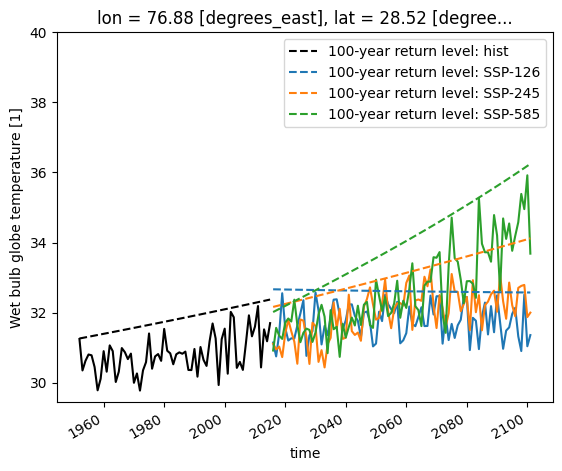

In [29]:
wetbulb_hist_delhi.plot.line(c='k')
wetbulb_126_delhi.plot.line(c='C0')
wetbulb_245_delhi.plot.line(c='C1')
wetbulb_585_delhi.plot.line(c='C2')

plt.plot(wetbulb_hist_delhi.time,estimate_return_level2(1-1/100,law_ns_hist_loc_shape),'k--',label='100-year return level: hist')
plt.plot(wetbulb_126_delhi.time,estimate_return_level2(1-1/100,law_ns_126_loc_shape),'C0--',label='100-year return level: SSP-126')
plt.plot(wetbulb_245_delhi.time,estimate_return_level2(1-1/100,law_ns_245_loc_shape),'C1--',label='100-year return level: SSP-245')
plt.plot(wetbulb_585_delhi.time,estimate_return_level2(1-1/100,law_ns_585_loc_shape),'C2--',label='100-year return level: SSP-585')

plt.legend()
plt.ylim(None,40)

In [30]:
law_ns_hist_loc_scale_shape = sd.GEV()
law_ns_hist_loc_scale_shape.fit(wetbulb_hist_delhi.values, c_loc = np.arange(wetbulb_hist_delhi.time.size), c_scale = np.arange(wetbulb_hist_delhi.time.size), c_shape = np.arange(wetbulb_hist_delhi.time.size))

law_ns_126_loc_scale_shape = sd.GEV()
law_ns_126_loc_scale_shape.fit(wetbulb_126_delhi.values, c_loc = np.arange(wetbulb_126_delhi.time.size), c_scale = np.arange(wetbulb_126_delhi.time.size), c_shape = np.arange(wetbulb_126_delhi.time.size))

law_ns_126_loc_scale_shape = sd.GEV()
law_ns_126_loc_scale_shape.fit(wetbulb_126_delhi.values, c_loc = np.arange(wetbulb_126_delhi.time.size), c_scale = np.arange(wetbulb_126_delhi.time.size), c_shape = np.arange(wetbulb_126_delhi.time.size))

law_ns_245_loc_scale_shape = sd.GEV()
law_ns_245_loc_scale_shape.fit(wetbulb_245_delhi.values, c_loc = np.arange(wetbulb_245_delhi.time.size), c_scale = np.arange(wetbulb_245_delhi.time.size), c_shape = np.arange(wetbulb_245_delhi.time.size))

law_ns_585_loc_scale_shape = sd.GEV()
law_ns_585_loc_scale_shape.fit(wetbulb_585_delhi.values, c_loc = np.arange(wetbulb_585_delhi.time.size), c_scale = np.arange(wetbulb_585_delhi.time.size), c_shape = np.arange(wetbulb_585_delhi.time.size))

(29.454648455698038, 40.0)

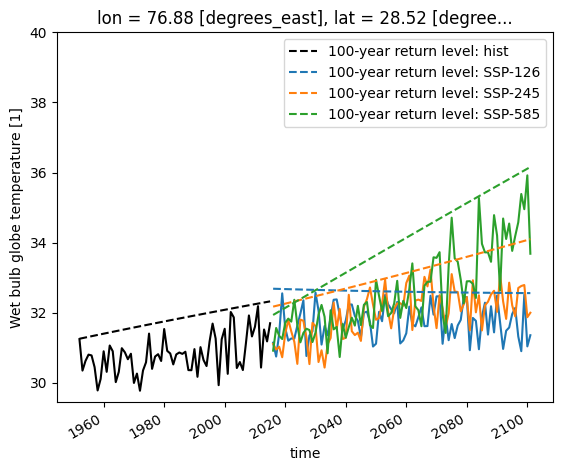

In [31]:
wetbulb_hist_delhi.plot.line(c='k')
wetbulb_126_delhi.plot.line(c='C0')
wetbulb_245_delhi.plot.line(c='C1')
wetbulb_585_delhi.plot.line(c='C2')

plt.plot(wetbulb_hist_delhi.time,estimate_return_level2(1-1/100,law_ns_hist_loc_scale_shape),'k--',label='100-year return level: hist')
plt.plot(wetbulb_126_delhi.time,estimate_return_level2(1-1/100,law_ns_126_loc_scale_shape),'C0--',label='100-year return level: SSP-126')
plt.plot(wetbulb_245_delhi.time,estimate_return_level2(1-1/100,law_ns_245_loc_scale_shape),'C1--',label='100-year return level: SSP-245')
plt.plot(wetbulb_585_delhi.time,estimate_return_level2(1-1/100,law_ns_585_loc_scale_shape),'C2--',label='100-year return level: SSP-585')

plt.legend()
plt.ylim(None,40)

In [32]:
compute_aic(law_ns_245)

136.83928076564047

In [33]:
aics = pd.DataFrame(columns=['hist','ssp126','ssp245','ssp585'],index=['loc','loc+scale','loc+shape','loc+scale+shape'])

aics['hist'] = compute_aic(law_ns_hist), compute_aic(law_ns_hist_loc_scale), compute_aic(law_ns_hist_loc_shape), compute_aic(law_ns_hist_loc_scale_shape)
aics['ssp126'] = compute_aic(law_ns_126), compute_aic(law_ns_126_loc_scale), compute_aic(law_ns_126_loc_shape), compute_aic(law_ns_126_loc_scale_shape)
aics['ssp245'] = compute_aic(law_ns_245), compute_aic(law_ns_245_loc_scale), compute_aic(law_ns_245_loc_shape), compute_aic(law_ns_245_loc_scale_shape)
aics['ssp585'] = compute_aic(law_ns_585), compute_aic(law_ns_585_loc_scale), compute_aic(law_ns_585_loc_shape), compute_aic(law_ns_585_loc_scale_shape)

In [34]:
aics.round(2)

,hist,ssp126,ssp245,ssp585
loc,96.58,123.99,136.84,179.08
loc+scale,96.19,125.95,138.82,167.71
loc+shape,98.06,125.74,138.64,175.91
loc+scale+shape,98.02,127.64,140.64,169.69


After looking at one location, we now make use of the spatial information:

This code fits the GEV distribution for each grid point. The takes some time to compute (around 9 minutes per dataset), so we have precomputed the data, and you just need to load it. Feel free to run (and/or modify) the computation when you have the time to wait

For the future scenarios we focus on the period 2070-2100 where there are less changes in time

In [13]:
fit_sp_hist = xr.open_dataset('wbgt_hist_raw_runmean7_gev.nc')
fit_sp_126 = xr.open_dataset('wbgt_126_raw_runmean7_gev_2071-2100.nc')
fit_sp_245 = xr.open_dataset('wbgt_245_raw_runmean7_gev_2071-2100.nc')
fit_sp_585 = xr.open_dataset('wbgt_585_raw_runmean7_gev_2071-2100.nc')

In [36]:
# fit_sp_hist = ef.fit_return_levels_sdfc_2d(wetbulb_hist.rename({'lon':'longitude','lat':'latitude'}),times=np.arange(1.1,1000),periods_per_year=1,kind='GEV',N_boot=0,full=True)
# fit_sp_hist.to_netcdf('wbgt_hist_raw_runmean7_gev.nc')
# fit_sp_126 = ef.fit_return_levels_sdfc_2d(wetbulb_126.sel(time=slice('2071','2100')).rename({'lon':'longitude','lat':'latitude'}),times=np.arange(1.1,1000),periods_per_year=1,kind='GEV',N_boot=0,full=True)
# fit_sp_126.to_netcdf('wbgt_126_raw_runmean7_gev_2071-2100.nc')
# fit_sp_245 = ef.fit_return_levels_sdfc_2d(wetbulb_245.sel(time=slice('2071','2100')).rename({'lon':'longitude','lat':'latitude'}),times=np.arange(1.1,1000),periods_per_year=1,kind='GEV',N_boot=0,full=True)
# fit_sp_245.to_netcdf('wbgt_245_raw_runmean7_gev_2071-2100.nc')
# fit_sp_585 = ef.fit_return_levels_sdfc_2d(wetbulb_585.sel(time=slice('2071','2100')).rename({'lon':'longitude','lat':'latitude'}),times=np.arange(1.1,1000),periods_per_year=1,kind='GEV',N_boot=0,full=True)
# fit_sp_585.to_netcdf('wbgt_585_raw_runmean7_gev_2071-2100.nc')

In [ ]:
fig, axs = plt.subplots(2,2,constrained_layout=True,figsize=(15,8),subplot_kw=dict(projection=ccrs.Robinson()))
ax = axs.flatten()

kwargs = dict(
    vmin=28,
    vmax=38,
    cmap=cmo.amp,
    transform=ccrs.PlateCarree(),
    add_colorbar=False
)

p = fit_sp_hist['return level'].sel({'return period':100},method='nearest').plot(ax=ax[0],**kwargs)
fit_sp_126['return level'].sel({'return period':100},method='nearest').plot(ax=ax[1],**kwargs)
fit_sp_245['return level'].sel({'return period':100},method='nearest').plot(ax=ax[2],**kwargs)
fit_sp_585['return level'].sel({'return period':100},method='nearest').plot(ax=ax[3],**kwargs)

cbar = fig.colorbar(p,ax=ax,pad=0.025,orientation='horizontal',shrink=0.75,label='100-year return level')

ax[0].set_title('Historical, 2005-2014')
ax[1].set_title('SSP-126, 2091-2100')
ax[2].set_title('SSP-245, 2091-2100')
ax[3].set_title('SSP-585, 2091-2100')

[axi.set_facecolor('grey') for axi in ax]
[axi.coastlines(lw=0.5) for axi in ax]

Let's look at the most intense heatwave in the last 10 years (2091-2100), and the most intense in 2005-2014

In [ ]:
fig, axs = plt.subplots(2,2,constrained_layout=True,figsize=(15,8),subplot_kw=dict(projection=ccrs.Robinson()))
ax = axs.flatten()

kwargs = dict(
    vmin=20,
    vmax=37,
    cmap=cmo.thermal,
    transform=ccrs.PlateCarree(),
    add_colorbar=False
)

p = wetbulb_hist.sel(time=slice('2005','2014')).max('time').where(lambda x:x>20).plot(ax=ax[0],**kwargs)
wetbulb_126.sel(time=slice('2091','2100')).max('time').where(lambda x:x>20).plot(ax=ax[1],**kwargs)
wetbulb_245.sel(time=slice('2091','2100')).max('time').where(lambda x:x>20).plot(ax=ax[2],**kwargs)
wetbulb_585.sel(time=slice('2091','2100')).max('time').where(lambda x:x>20).plot(ax=ax[3],**kwargs)

cbar = fig.colorbar(p,ax=ax,pad=0.025,orientation='horizontal',shrink=0.75,label='Most extreme 7-day mean WBGT')

ax[0].set_title('Historical, 2005-2014')
ax[1].set_title('SSP-126, 2091-2100')
ax[2].set_title('SSP-245, 2091-2100')
ax[3].set_title('SSP-585, 2091-2100')

[axi.set_facecolor('grey') for axi in ax]
[axi.coastlines(lw=0.5) for axi in ax]

In [ ]:
fig, axs = plt.subplots(2,2,constrained_layout=True,figsize=(15,8),subplot_kw=dict(projection=ccrs.Robinson()))
ax = axs.flatten()

kwargs = dict(
    vmin=0,
    # vmin=20,
    # vmax=37,
    cmap=cmo.amp,
    transform=ccrs.PlateCarree(),
    add_colorbar=False
)

p = (wetbulb_hist.sel(time=slice('2005','2014')).max('time')>31).plot(ax=ax[0],**kwargs)
(wetbulb_126.sel(time=slice('2091','2100')).max('time')>31).plot(ax=ax[1],**kwargs)
(wetbulb_245.sel(time=slice('2091','2100')).max('time')>31).plot(ax=ax[2],**kwargs)
(wetbulb_585.sel(time=slice('2091','2100')).max('time')>31).plot(ax=ax[3],**kwargs)

# cbar = fig.colorbar(p,ax=ax,pad=0.025,orientation='horizontal',shrink=0.75,label='Most extreme 7-day mean WBGT')

ax[0].set_title('Historical, 2005-2014')
ax[1].set_title('SSP-126, 2091-2100')
ax[2].set_title('SSP-245, 2091-2100')
ax[3].set_title('SSP-585, 2091-2100')

[axi.set_facecolor('grey') for axi in ax]
[axi.coastlines(lw=0.5) for axi in ax]

fig.suptitle('Shaded regions for most extreme heatwave is > 31 WBGT')

In [ ]:
fig, axs = plt.subplots(2,2,constrained_layout=True,figsize=(15,8),subplot_kw=dict(projection=ccrs.Robinson()))
ax = axs.flatten()

kwargs = dict(
    vmin=31,
    vmax=37,
    cmap=cmo.amp,
    transform=ccrs.PlateCarree(),
    add_colorbar=False
)

p = (wetbulb_hist.sel(time=slice('2005','2014')).max('time')).plot(ax=ax[0],**kwargs)
(wetbulb_126.sel(time=slice('2091','2100')).max('time')).plot(ax=ax[1],**kwargs)
(wetbulb_245.sel(time=slice('2091','2100')).max('time')).plot(ax=ax[2],**kwargs)
(wetbulb_585.sel(time=slice('2091','2100')).max('time')).plot(ax=ax[3],**kwargs)

cbar = fig.colorbar(p,ax=ax,pad=0.025,orientation='horizontal',shrink=0.75,label='Most extreme 7-day mean WBGT')

ax[0].set_title('Historical, 2005-2014')
ax[1].set_title('SSP-126, 2091-2100')
ax[2].set_title('SSP-245, 2091-2100')
ax[3].set_title('SSP-585, 2091-2100')

[axi.set_facecolor('grey') for axi in ax]
[axi.coastlines(lw=0.5) for axi in ax]

# fig.suptitle('Shaded regions for most extreme heatwave is > 31 WBGT')

Now we want to look at how the fraction of the Earth's land surface that experiences such extreme heatwaves changes over time. For this we need the area of each grid box which have been pre-computed. 

We then take the temporal-spatial data and assign it the value "1" if it exceeds the threshold and the value "0" if it does not. Performing area-weighted averaging over the whole world gives the fraction of land area that experiences a heat wave above the threshold in each year.

Let's compute this for a few different temperature threshold, we suggest 31, 28 and 33 degrees. 

Look at the time evolution - what do you see?

In [ ]:
area = xr.open_dataarray('area_mpi.nc')
area_land = xr.open_dataarray('area_land_mpi.nc').fillna(0.)

In [ ]:
((wetbulb_hist>31)*1).weighted(area_land).mean(['lon','lat']).plot.line('k.-',label='historical')
((wetbulb_126>31)*1).weighted(area_land).mean(['lon','lat']).plot.line('.-',label='SSP-126')
((wetbulb_245>31)*1).weighted(area_land).mean(['lon','lat']).plot.line('.-',label='SSP-245')
((wetbulb_585>31)*1).weighted(area_land).mean(['lon','lat']).plot.line('.-',label='SSP-585')

plt.grid(True)

plt.legend()
plt.ylabel('land area fraction')
plt.title('Fraction of land area with 7 days of wet bulb temperature > 31 degrees')

In [ ]:
((wetbulb_hist>28)*1).weighted(area_land).mean(['lon','lat']).plot.line('k.-',label='historical')
((wetbulb_126>28)*1).weighted(area_land).mean(['lon','lat']).plot.line('.-',label='SSP-126')
((wetbulb_245>28)*1).weighted(area_land).mean(['lon','lat']).plot.line('.-',label='SSP-245')
((wetbulb_585>28)*1).weighted(area_land).mean(['lon','lat']).plot.line('.-',label='SSP-585')

plt.grid(True)

plt.legend()
plt.ylabel('land area fraction')
plt.title('Fraction of land area with 7 days of wet bulb temperature > 28 degrees')

In [ ]:
((wetbulb_hist>33)*1).weighted(area_land).mean(['lon','lat']).plot.line('k.-',label='historical')
((wetbulb_126>33)*1).weighted(area_land).mean(['lon','lat']).plot.line('.-',label='SSP-126')
((wetbulb_245>33)*1).weighted(area_land).mean(['lon','lat']).plot.line('.-',label='SSP-245')
((wetbulb_585>33)*1).weighted(area_land).mean(['lon','lat']).plot.line('.-',label='SSP-585')

plt.grid(True)

plt.legend()
plt.ylabel('land area fraction')
plt.title('Fraction of land area with 7 days of wet bulb temperature > 33 degrees')

In [ ]:
(pd.Series(
    index=['historical','SSP-126','SSP-245','SSP-585'],
    data=[
    ((wetbulb_hist>28)*1).weighted(area_land).mean(['lon','lat']).isel(time=slice(-10,None)).mean().values,
    ((wetbulb_126>28)*1).weighted(area_land).mean(['lon','lat']).isel(time=slice(-10,None)).mean().values,
    ((wetbulb_245>28)*1).weighted(area_land).mean(['lon','lat']).isel(time=slice(-10,None)).mean().values,
    ((wetbulb_585>28)*1).weighted(area_land).mean(['lon','lat']).isel(time=slice(-10,None)).mean().values
    ]
).astype(float) * 100).round(2)

In [ ]:
(pd.Series(
    index=['historical','SSP-126','SSP-245','SSP-585'],
    data=[
    ((wetbulb_hist>33)*1).weighted(area_land).mean(['lon','lat']).isel(time=slice(-10,None)).mean().values,
    ((wetbulb_126>33)*1).weighted(area_land).mean(['lon','lat']).isel(time=slice(-10,None)).mean().values,
    ((wetbulb_245>33)*1).weighted(area_land).mean(['lon','lat']).isel(time=slice(-10,None)).mean().values,
    ((wetbulb_585>33)*1).weighted(area_land).mean(['lon','lat']).isel(time=slice(-10,None)).mean().values
    ]
).astype(float) * 100).round(2)

We see that a smaller fraction of the Earth experiences more extreme heat waves - as expected.

However, the difference between the scenarios becomes larger for more extreme events:
The area fraction that experiences heat waves above 28 degrees increases by 51.05 / 20.68 = 2.46 times between historical and SSP-585 scenarios, but for heat waves above 33 degrees it is 5.18 / 0.15 = 34.53 times!